In [14]:
# Import the requests library for making HTTP requests
import requests

# Import the Path class from the pathlib module for handling file system paths
from pathlib import Path


In [15]:
from pathlib import Path
import requests

# Check if the file "ov_phi3_vision.py" does not exist
if not Path("ov_phi3_vision.py").exists():
    # If the file does not exist, download it from the specified URL
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/notebooks/phi-3-vision/ov_phi3_vision.py")
    # Write the content of the downloaded file to "ov_phi3_vision.py"
    open("ov_phi3_vision.py", "w").write(r.text)

# Check if the file "gradio_helper.py" does not exist
if not Path("gradio_helper.py").exists():
    # If the file does not exist, download it from the specified URL
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/notebooks/phi-3-vision/gradio_helper.py")
    # Write the content of the downloaded file to "gradio_helper.py"
    open("gradio_helper.py", "w").write(r.text)

# Check if the file "notebook_utils.py" does not exist
if not Path("notebook_utils.py").exists():
    # If the file does not exist, download it from the specified URL
    r = requests.get(url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py")
    # Write the content of the downloaded file to "notebook_utils.py"
    open("notebook_utils.py", "w").write(r.text)


In [16]:
# Import the convert_phi3_model function from the ov_phi3_vision module
from ov_phi3_vision import convert_phi3_model

In [ ]:
# Import the Path class from the pathlib module for handling file system paths
from pathlib import Path

# Import the nncf library for model compression
import nncf

# Define the model ID for the Phi-3 vision model
model_id = "microsoft/Phi-3-vision-128k-instruct"

# Define the output directory for the compressed model
out_dir = Path("model/phi3-vision/int4")

# Define the compression configuration for the model
compression_configuration = {
    "mode": nncf.CompressWeightsMode.INT4_SYM,  # Set the compression mode to INT4 symmetric
    "group_size": 64,  # Set the group size for compression
    "ratio": 0.6,  # Set the compression ratio
}
# Convert the Phi-3 model using the specified model ID, output directory, and compression configuration
convert_phi3_model(model_id, out_dir, compression_configuration)

⌛ Phi-3-vision conversion started. Be patient, it may takes some time.
⌛ Load Original model


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


✅ Original model successfully loaded
⌛ Convert Input embedding model
✅ Input embedding model successfully converted
⌛ Convert Image embedding model


C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\transformers\modeling_utils.py:4481: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\transformers\models\clip\modeling_clip.py:276: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (bsz * self.num_heads, tgt_len, src_len):
C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\transformers\models\clip\modeling_clip.py:316: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated

✅ Image embedding model successfully converted
⌛ Convert Image projection model


You are not running the flash-attention implementation, expect numerical differences.


✅ Image projection model successfully converted
⌛ Convert Language model


C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\transformers\modeling_attn_mask_utils.py:114: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if (input_shape[-1] > 1 or self.sliding_window is not None) and self.is_causal:
C:\Users\kinfeylo\AppData\Roaming\Python\Python311\site-packages\transformers\modeling_attn_mask_utils.py:162: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if past_key_values_length > 0:
C:\Users\kinfeylo\.cache\huggingface\modules\transformers_modules\microsoft\Phi-3-vision-128k-instruct\6065b7a1a412feff7ac023149f6535

✅ Language model successfully converted
⌛ Weights compression with int4_sym mode started


Output()

INFO:nncf:Statistics of the bitwidth distribution:
+----------------+-----------------------------+----------------------------------------+
|   Num bits (N) | % all parameters (layers)   | % ratio-defining parameters (layers)   |
+================+=============================+========================================+
|              8 | 42% (54 / 129)              | 40% (53 / 128)                         |
+----------------+-----------------------------+----------------------------------------+
|              4 | 58% (75 / 129)              | 60% (75 / 128)                         |
+----------------+-----------------------------+----------------------------------------+


Output()

✅ Weights compression finished
✅ Phi-3-vision model conversion finished. You can find results in model\phi3-vision\int4


In [18]:
# Import the device_widget function from the notebook_utils module
from notebook_utils import device_widget

# Create a device widget with the default device set to "GPU" and excluding "NPU"
device = device_widget(default="GPU", exclude=["NPU"])

# Display the device widget
device


Dropdown(description='Device:', index=1, options=('CPU', 'GPU', 'AUTO'), value='GPU')

In [19]:
# Import the OvPhi3Vision class from the ov_phi3_vision module
from ov_phi3_vision import OvPhi3Vision


In [20]:
# The output directory for the compressed model
out_dir

WindowsPath('model/phi3-vision/int4')

In [21]:
# Initialize the OvPhi3Vision model with the specified output directory and device
model = OvPhi3Vision(out_dir, device.value)


In [22]:
# Import the requests library for making HTTP requests
import requests

# Import the Image class from the PIL (Pillow) library for image processing
from PIL import Image


In [23]:
# Open an image file located at "./imgs/demo.png" using the PIL library
image = Image.open(r"./imgs/demo.png")

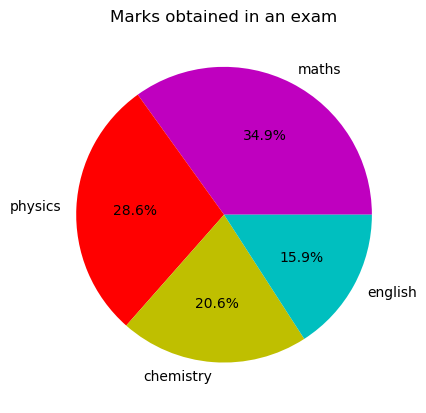

In [24]:
# Display the opened image
image


In [25]:
# Import the AutoProcessor and TextStreamer classes from the transformers library
from transformers import AutoProcessor, TextStreamer

# Define the messages to be processed, including an image and a request to create Python code
messages = [
    {"role": "user", "content": "<|image_1|>\nPlease create Python code for image, and use plt to save the new picture under imgs/ and name it phi-3-vision.jpg."},
]

# Load the processor from the pretrained model specified by the output directory
processor = AutoProcessor.from_pretrained(out_dir, trust_remote_code=True)

# Apply the chat template to the messages to create a prompt for the model
prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

# Process the prompt and the image, returning the inputs as tensors
inputs = processor(prompt, [image], return_tensors="pt")

# Define the generation arguments for the model
generation_args = {"max_new_tokens": 3072, "do_sample": False, "streamer": TextStreamer(processor.tokenizer, skip_prompt=True, skip_special_tokens=True)}

# Print a message indicating that the coding process is starting
print("Coding:")

# Generate the model's output based on the inputs and generation arguments
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Coding:
To create a pie chart representing marks obtained in an exam, we can use the matplotlib library in Python. Here is a step-by-step guide on how to do it:



1. First, import the necessary libraries. We need matplotlib for creating the pie chart and pandas for handling the data.


```python
import matplotlib.pyplot as plt
import pandas as pd
```

2. Next, we need to create a DataFrame from the given data.
```python
data = {'subject': ['maths', 'physics', 'chemistry', 'english'], 'marks': [340, 300, 2000, 150]}
df = pd.DataFrame(data)
```
3. Now, we can create the pie chart. We use the 'autop' parameter to display the percentage of each slice.
```python
plt = plt.pie(df['marks'], labels = df['subject'], autop=True, colors=['red','blue','yellow','green'])
```
4. Finally, we can display the chart and save it as a jpg file.
```python
plt.title('Marks obtained in an exam')
plt.savefig('imgs/im-3-3-3.jpg')
```

This code will create a pie chart representing the marks obtained in an exa